# Fruit 10
It's a whole new model.

## The Imports

In [19]:
try:
    import numpy as np
    import tensorflow as tf
    import matplotlib.pyplot as plt
    import cv2 as cv
    import os
except ImportError as e:
    print(f"ImportError: {e}")
    print("Installing missing packages...")
    !pip install numpy tensorflow matplotlib opencv-python
    import numpy as np
    import tensorflow as tf
    import matplotlib.pyplot as plt
    import cv2 as cv
    import os

## The Dataset

In [20]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'res/datasets/fruits360',
    labels='inferred',
    label_mode='categorical',
    class_names=['Apple Red 1', 'Banana', 'Cauliflower', 'Corn', 'Cucumber Ripe', 'Ginger Root', 'Onion Red Peeled', 'Pepper Red', 'Pineapple', 'Raspberry'],
    color_mode='rgb',
    batch_size=32,
    image_size=(100, 100),
    shuffle=True,
    seed=42,
    validation_split=0.2,  # Corrected parameter name
    subset="training",     # Use "training" for the training set
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1000 files belonging to 10 classes.
Using 800 files for training.


In [21]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'res/datasets/fruits360',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=['Apple Red 1', 'Banana', 'Cauliflower', 'Corn', 'Cucumber Ripe', 'Ginger Root', 'Onion Red Peeled', 'Pepper Red', 'Pineapple', 'Raspberry'],
    color_mode='rgb',
    batch_size=32,
    image_size=(100,100),
    shuffle= True,
    seed=42,
    validation_split=0.2,
    subset= "validation",
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False
)

Found 1000 files belonging to 10 classes.
Using 200 files for validation.


## The Model

In [22]:
cnn= tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[100,100,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=5, strides=3))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [23]:
cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               7372928   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

## The Training

In [24]:
training_history= cnn.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
25/25 [==============================] - 2s 55ms/step - loss: 98.6013 - accuracy: 0.5688 - val_loss: 0.2753 - val_accuracy: 0.9350
Epoch 2/5
25/25 [==============================] - 1s 55ms/step - loss: 0.1585 - accuracy: 0.9563 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 3/5
25/25 [==============================] - 1s 50ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.0491 - val_accuracy: 0.9800
Epoch 4/5
25/25 [==============================] - 1s 51ms/step - loss: 0.0548 - accuracy: 0.9862 - val_loss: 4.5558e-04 - val_accuracy: 1.0000
Epoch 5/5
25/25 [==============================] - 1s 51ms/step - loss: 0.1167 - accuracy: 0.9825 - val_loss: 0.0253 - val_accuracy: 0.9950


In [25]:
# cnn.save('fruit10_model.h5')

## The Results

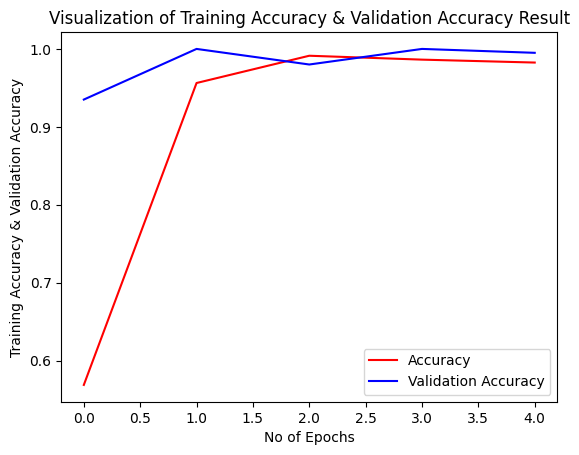

In [26]:
plt.plot(training_history.history['accuracy'],color='red',label='Accuracy')
plt.plot(training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend()
plt.show()

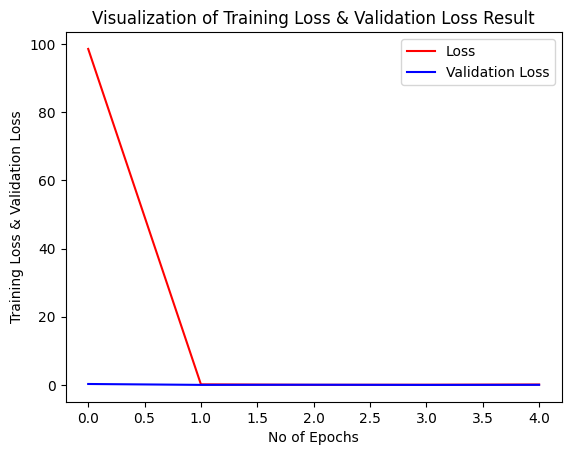

In [27]:
plt.plot(training_history.history['loss'],color='red',label='Loss')
plt.plot(training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend()
plt.show()

## The Testing

In [28]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'res/datasets/fruits360_test',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(100,100),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False
)

Found 50 files belonging to 10 classes.


In [29]:
def preprocess_single_image(image_path, target_size=(100, 100)):
    img = cv.imread(image_path)
    img = cv.resize(img, target_size)
    img = np.expand_dims(img, axis=0)
    return img

def testing_images(num_images, current_path):
    # Get a list of all files in the directory
    file_list = os.listdir(current_path)

    # Create subplots for each class in a single row
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    class_names=['Apple Red 1', 'Banana', 'Cauliflower', 'Corn', 'Cucumber Ripe', 'Ginger Root', 'Onion Red Peeled', 'Pepper Red', 'Pineapple', 'Raspberry']
    
    for i in range(min(num_images, len(file_list))):
        # Construct the path to the current image in the sorted list
        current_image_path = os.path.join(current_path, file_list[i])

        # Preprocess the single image
        single_image = preprocess_single_image(current_image_path)
        
        # Make predictions on the single image
        single_image_prediction = cnn.predict(single_image)
        single_image_prediction_class = np.argmax(single_image_prediction)

        # Display the single image with the predicted label
        axes[i].imshow(cv.cvtColor(cv.imread(current_image_path), cv.COLOR_BGR2RGB))
        axes[i].set_title(f"Predicted: {class_names[single_image_prediction_class]}")
        axes[i].axis('off')

1/1 [==============================] - 0s 8ms/step


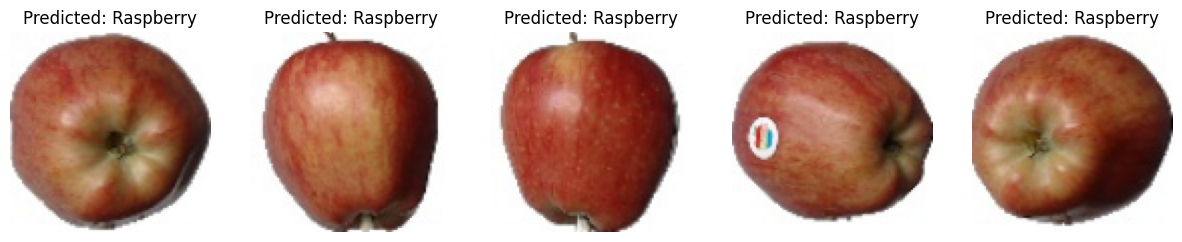

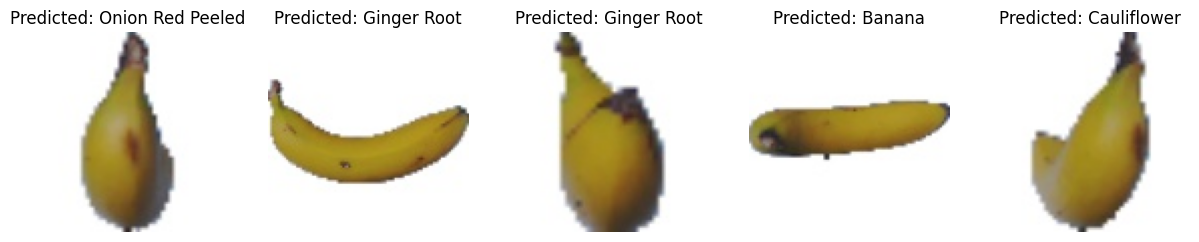

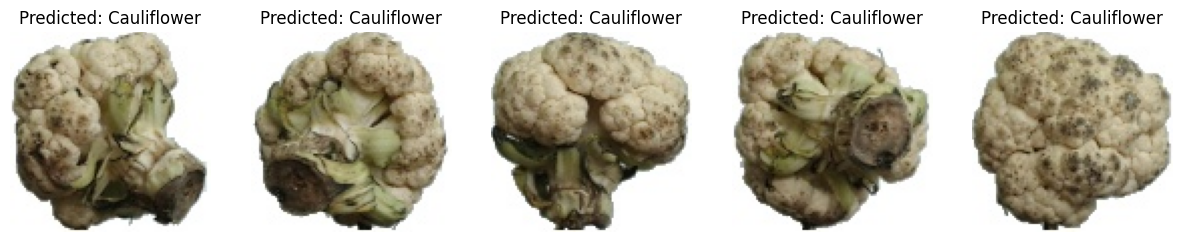

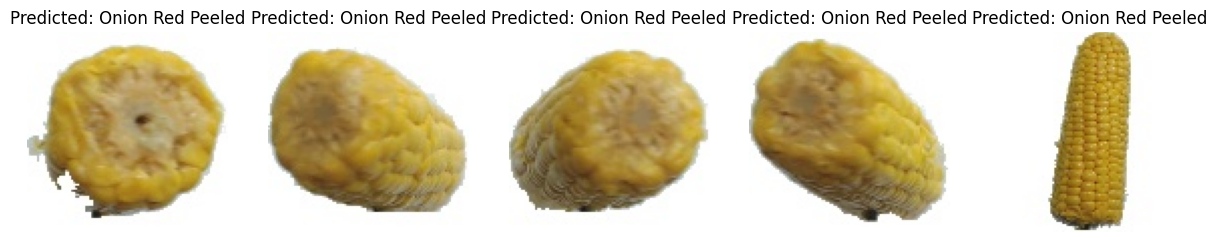

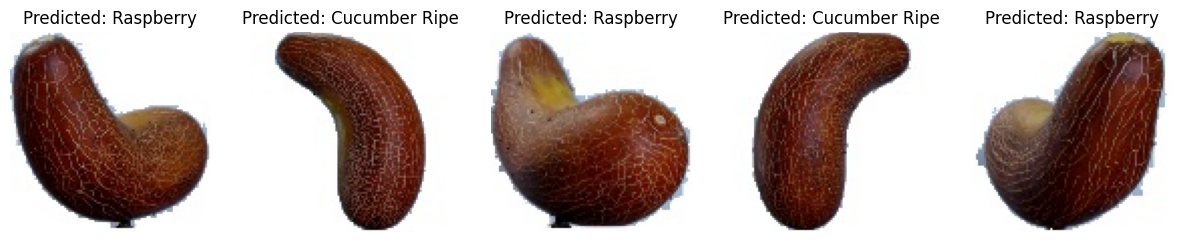

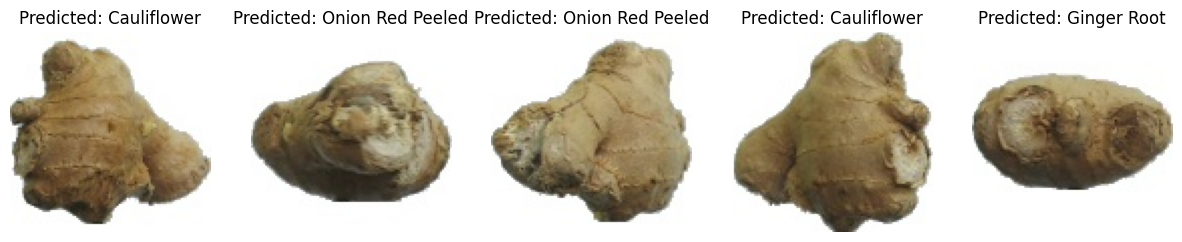

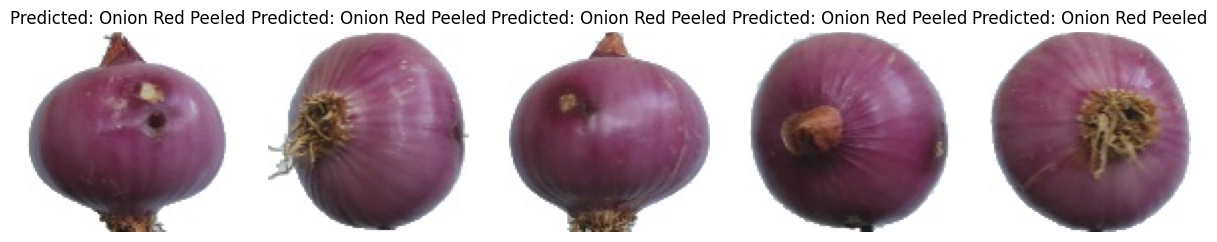

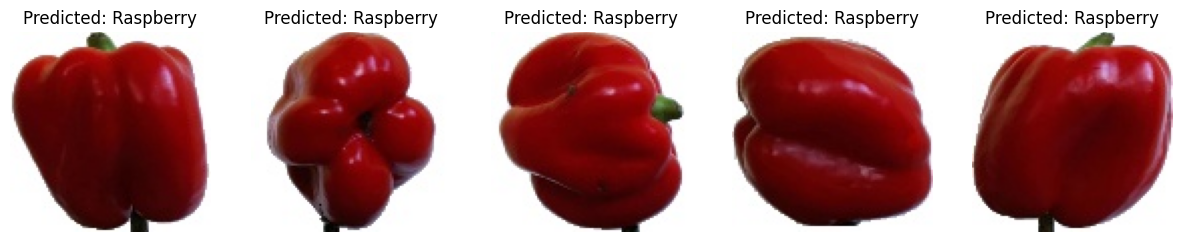

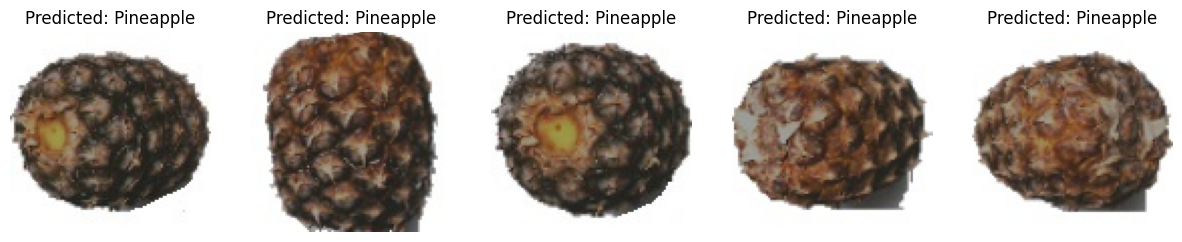

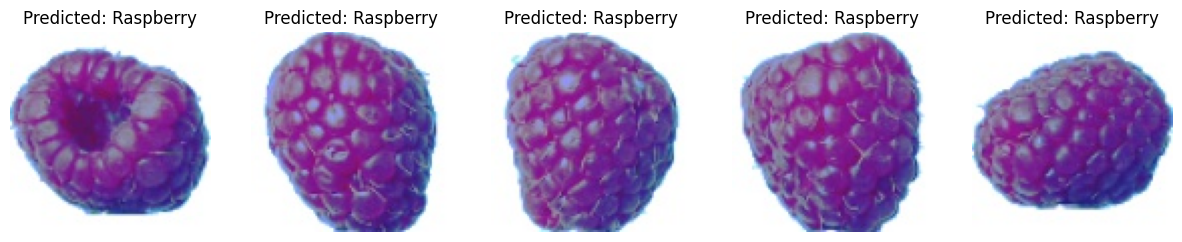

In [30]:
# Set the path to your folder containing images
apple_dir = 'res/datasets/fruits360_test/Apple Red 1'
banana_dir = 'res/datasets/fruits360_test/Banana'
cauliflower_dir = 'res/datasets/fruits360_test/Cauliflower'
corn_dir = 'res/datasets/fruits360_test/Corn'
cucumber_dir = 'res/datasets/fruits360_test/Cucumber Ripe'
ginger_dir = 'res/datasets/fruits360_test/Ginger Root'
onion_dir = 'res/datasets/fruits360_test/Onion Red Peeled'
pepper_dir = 'res/datasets/fruits360_test/Pepper Red'
pineapple_dir = 'res/datasets/fruits360_test/Pineapple'
raspberry_dir = 'res/datasets/fruits360_test/Raspberry'

NUM_TEST_IMG = 5
testing_images(NUM_TEST_IMG, apple_dir)
testing_images(NUM_TEST_IMG, banana_dir)
testing_images(NUM_TEST_IMG, cauliflower_dir)
testing_images(NUM_TEST_IMG, corn_dir)
testing_images(NUM_TEST_IMG, cucumber_dir)
testing_images(NUM_TEST_IMG, ginger_dir)
testing_images(NUM_TEST_IMG, onion_dir)
testing_images(NUM_TEST_IMG, pepper_dir)
testing_images(NUM_TEST_IMG, pineapple_dir)
testing_images(NUM_TEST_IMG, raspberry_dir)